# Clustering

## KMeans

#### Kmeans Theory

Kmeans is 

- iterative
- top-down (divisive)

In broad strokes: 
- the number of clusters is given beforehand
- initial centers of clusters are found
- for each point:
  - distances to each cluster center are found
  - points are assigned the cluster to whos center they're closest
- new centers of clusters are calculated
- the two processes above are repeated until a set threshold is met (# of epochs, a minimal number of pts are not switched clusters, etc.)

![top](img/from-top.gif)

- we repeat this process for another cluster number
- we determine the best number of clusters by:
  - silhouette scores
      - (the distance of each point to its cluster center / avg distance of pts in that cluster to the center)
      - higher scores -> tighter clusters, higher scores are better
      - usually graphed to make the determination of best cluster easier to see

#### Kmeans Code

In [2]:
# Required packages
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Familiar packages for plotting, data manipulation, and numeric functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import my own code for the demo clusters
from demo_images import *

# Have plots appear in notebook
%matplotlib inline

# Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

In [30]:
dummy_dat = pd.read_csv("xclara.txt",header=0,index_col=0)

dummy_dat.head()

,V1,V2
1,2.072345,-3.241693
2,17.936710,15.784810
3,1.083576,7.319176
4,11.120670,14.406780
5,23.711550,2.557729


In [31]:
dummy_dat.describe()

,V1,V2
count,3000.000000,3000.000000
mean,40.611358,22.862141
std,25.859054,31.759714
min,-22.495990,-38.795500
25%,18.462790,-4.003494
50%,41.552210,13.827390
75%,62.249480,55.729100
max,104.376600,87.313700


In [32]:
ss = StandardScaler()

dummy_dat = ss.fit_transform(dummy_dat)
dummy_dat = pd.DataFrame(dummy_dat, columns=['V1', 'V2'])

In [59]:
model = KMeans(n_clusters=3).fit(dummy_dat)

In [60]:
model.cluster_centers_

array([[-3.44350884e-01,  1.17489399e+00,  1.57651669e-14],
       [ 1.13375038e+00, -1.03865167e+00,  1.00000000e+00],
       [-5.88064078e-01,  2.51515162e-01,  2.41368078e+00]])

Do you have different cluster_centers?
*Good!*

We saw in the demo that the algorithm is sensitive to starting points.

We can use the additional argument `random_state` to set the seed and have a repeatable results

Let's try grabbing 4 clusters and see what we get

In [78]:
model_setseed = KMeans(n_clusters=3, random_state=10).fit(dummy_dat)
model_setseed.cluster_centers_

array([[ 4.18221584e-03,  1.16069131e+00,  1.04360964e-14],
       [-1.20459061e+00, -3.81863593e-01,  2.00000000e+00],
       [ 1.13375038e+00, -1.03865167e+00,  1.00000000e+00]])

We can grab the cluster each obs is assigned to 

In [79]:
cluster_labels = model_setseed.fit_predict(dummy_dat)
cluster_labels

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

throw it in our dataframe

In [80]:
dummy_dat['clusters'] = cluster_labels

and graph

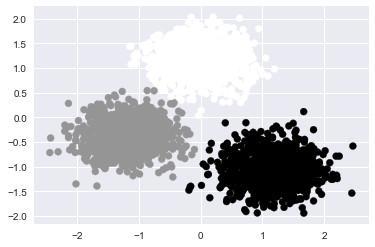

In [81]:
x_dim = range(0, len(dummy_dat))
plt.scatter(dummy_dat['V1'], dummy_dat['V2'], c=dummy_dat['clusters'])
plt.show()

And we can generate metrics with silhouette score

In [82]:
metrics.silhouette_score(dummy_dat, cluster_labels)

0.7296473843287024

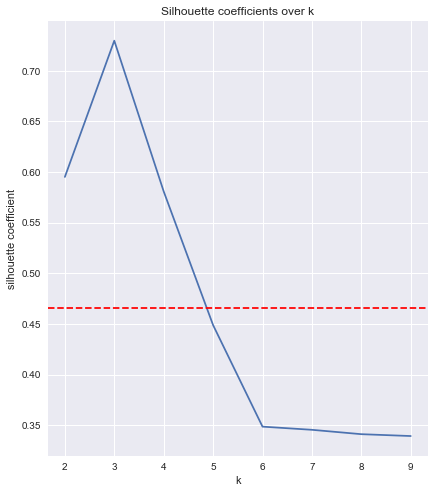

In [83]:
# Generate silhouette coefficient for each k
X = dummy_dat
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)
    
# Plot Silhouette coefficient
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

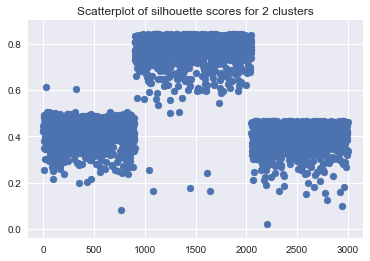

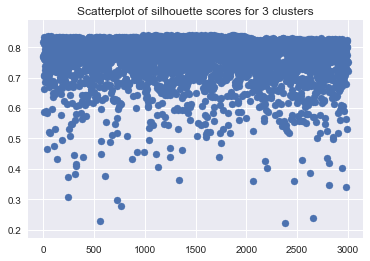

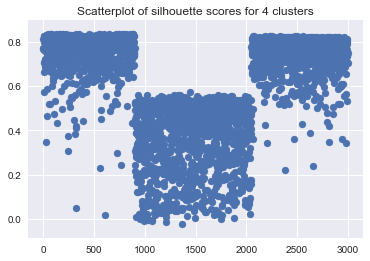

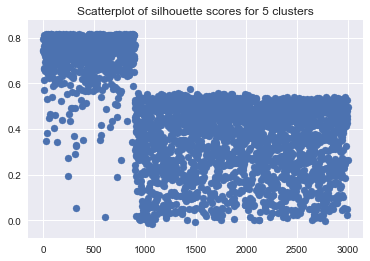

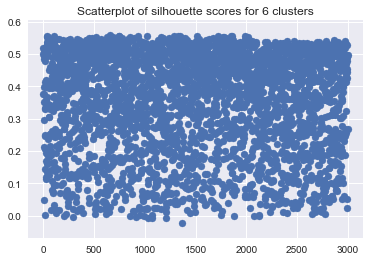

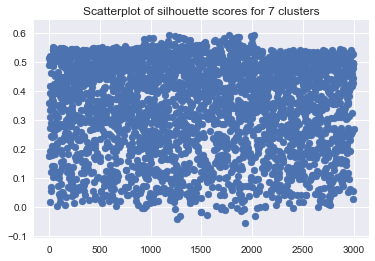

In [29]:
#scatterplot of silhouette scores
X = dummy_dat

for k in range(2,8):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    samples = silhouette_samples(X, cluster_labels)
    plt.scatter(range(0,len(samples)), samples)
    plt.title('Scatterplot of silhouette scores for {} clusters'
              .format(k)
             )
    plt.show()

## Hierarchical clustering

> Set of points before any clustering
![](img/pre_cluster_points.png)

### Visualizations

Can allow us to see the clusters within clusters 

![](img/clustergram.png)

### Dendrogram

- Useful in visualizing HIGH dimensional separation
- Can choose just "n" clusters
    + cut the link of the highest tree for two clusters
    + clusters are more alike

![](img/dendrogram.png)

## Theory

As opposed to "top-down" of kmeans, hierarchical clustering is "bottom-up" (agglomerative)

It's still an iterative process:

- find the closest pair of points using a type of distance metric
- assign to a cluster
- for the next closest pair of points:
    - If one of the points is already assigned a cluster, aggregate points into an existing cluster
    - If none of the points are already assigned a cluster, create a new cluster
- continue until all points are assigned a cluster
- continue aggregating clusters until points are in the same cluster
- determine optimal number of points by:
    - silhouette score a la kmeans
    - jumps in dendrogram

## Types

### Single link

(Not in scikit-learn)

- links at the distance between (closest points) in each cluster
- tends to create elongated clusters (reachs out to the other points)
- tends to eat-up a lot of the points for a cluster

### Complete link

- Same as single link, however uses the farthest point
- Tends to create more compact clusters
- However, will tend to "ignore" other points that are *similar* to the actual cluster

### Average link

- Same as complete but will use the measurement average for each point-to-point distance in each cluster

### Ward

- Minimizes variance during cluster merge
    + Center between cluster calculated
    + Sum Sq-Distance from pts in clusters to center
    + Subtract pt distance from cluster centers
 
 
$$Dist(A, B) = \sum_{x_a \in A} \sum_{x_b \in B} \left [ (c_0-x_a)^2 + (c_0-x_b)^2  - (c_a-x_a)^2 - (c_b-x_b)^2  \right] $$

### Hierarchical code

In [21]:
from sklearn import datasets, cluster
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, ward, single

In [22]:
X = datasets.load_iris().data[:70]

c = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = c.fit_predict(X)

model = cluster.AgglomerativeClustering(n_clusters=3)
model = model.fit(X)

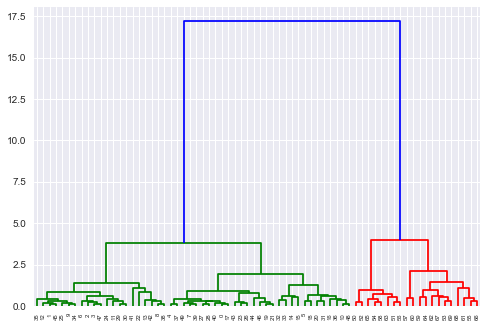

In [25]:
link_matrix = ward(X)
dendrogram(link_matrix)
plt.show()